<h2>Restaurant Distribution and Future Potentials to Open New Restaurant in Rome, Italy </h2>

<h2>Problem Description </h2>

The city of Rome is one of the most beautiful cities with a very diverse culture in Europe. It is also the preferred destination of locals and tourists from all over the world and home of very ancient churches and monuments. However, as it is the city with old buildings and narrow city roads, most of the tourist destination areas do not have appropriate facilities to customers including car parking and there are very limited restaurants that offer such access to the customers near the downtown area where most tourists prefer to dine. However, there are areas with large spaces to accommodate customers demand within a short distance from the centre of the city. This project will explore the neighbourhoods in the city and develop a tool that will provide a information for our clients who wants to own restaurants in the city. The tool will able to provide convenient locations in the city for our clients to open new restaurants and properly address the following questions. 
<ul>

<li>Is it a busy area with highest foot traffic?  </li>

<li>Is there enough parking area? </li>

<li>Have several other restaurants opened at the same spot? </li>

<li>What are the specific types of cuisine available at the area? </li>
</ul>

<h2>Data Description </h2>

In this project, we will use the Foursquare location data which allow us to access precise, up-to-date community-sourced venue data.  Foursquare location data is a widely used source of location data and provides very precise information. It also provides global points of interest coverage, over 65 Rich and descriptive venue attributes, and human verified for freshness & accuracy (https://developer.foursquare.com). As we are trying to develop a tool to address our client requirement and allow them gathering information including the available restaurants and customers rate in the city of Rome where large number of tourists are dining, the JSON file from Foursquare location data provides enough information to develop this particular project including the name, unique ID, location, the category and customer rates of most restaurants in the city. For example, the Foursquare location data search for restaurant returns the meta data of all the restaurants in the city. For instance, Sushiya Sushi Restaurant is one of the search results with information such as location of latitude of 41.897051, longitude 12.478725, and under the categories of Sushi Restaurant. 

<h2>Methodology </h2>

In this project we will collect and catagorize restraunts in the city of Rome, particularly for those near the most visisted tourist destination in the city includinmg the downtown area and vatican city. Most of these areas can be reached within 5km from the center; therefore, our study will focus on these areas. 
To begin the anylsis, the required data have been collected from diffrent sources. As an imput for our Foursquare data search, we have collected the top 7 tourist destination in the city from one of the most popular travel advisory site, voyagetip (https://www.voyagetips.com/en/things-to-do-in-rome/) order to explore the restuarents with in 1000m from those site seeing places and we also identify the location of these tourist destination area  according to Foursquare and are shown below. 

<ul>
<li>Baths of Caracalla, Rome, RM, Italy (41.879040, 12.492439)</li>
<li>Hadrian's Villa, Tivoli, RM, Italy (41.942802, 12.774399)</li>
<li>Circus Maximus, Rome, RM, Italy (41.886131, 12.485133)</li>
<li>Spanish Steps, Rome, RM, Italy (41.905991, 12.482775)</li>
<li>Pantheon, Rome, RM, Italy (41.898609, 12.476873)</li>
<li>Trevi Fountain, Rome, Italy (41.900932, 12.483313)</li>
<li>Roman Forum, Rome, RM, Italy (41.892464, 12.485325)</li>
<li>Coliseum, Rome, RM, Italy (41.890209, 12.492231)</li></ul>


Then, we have collected the location and category of every restaurant within 1000m radius from each historic sites referenceing the latitude and longitude of the sites from Foursquare categorization. Once we have the restaurants with in the specified radius from the center, we counted the total number of restaurants serving the tourists in the area. These numbers will provide a basic information of restuarant distributions in the city and identify place with high potential to open new restuarants in the city. However, there are other factors which might be considered and further ground survey should be perfomed. 


<h2>Analysis</h2>

In [203]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt

#!conda install -c conda-forge geopy --yes 
#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium 0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [204]:
CLIENT_ID = 'OIJHNAIJ4DBCJWKW140OKMJM3VBFMHBOBR2M4SINZ3NJP1OA' # your Foursquare ID
CLIENT_SECRET = 'BCIU20WKLLIX3PV0QNG0Z24Z3H4WAKZ5BOO45YZG2KEJAOTT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500

In [205]:
# Identify the latitude and longitude of the top 8 historic sites in Rome

add = ['Baths of Caracalla, Rome, RM, Italy','Circus Maximus, Rome, RM, Italy','Spanish Steps, Rome, RM, Italy', 'Pantheon, Rome, RM, Italy','Trevi Fountain, Rome, Italy', 'Roman Forum, Rome, RM, Italy', 'The Colosseum of Rome, Rome, Italy','Piazza di Spagna, 00187 Roma RM, Italy']
lat =[]
lon=[]
for address in add:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.append(latitude)
    lon.append(longitude )
# print(latitude, longitude)

df2 = pd.DataFrame() #np.array(add, lat, lon)
df2['address']=add
df2['lat']=lat
df2['lon']=lon
print(df2)

                                  address        lat        lon
0     Baths of Caracalla, Rome, RM, Italy  41.878828  12.492474
1         Circus Maximus, Rome, RM, Italy  41.885654  12.486167
2          Spanish Steps, Rome, RM, Italy  41.906052  12.482873
3               Pantheon, Rome, RM, Italy  41.898616  12.476833
4             Trevi Fountain, Rome, Italy  41.900978  12.483285
5            Roman Forum, Rome, RM, Italy  41.891724  12.486671
6      The Colosseum of Rome, Rome, Italy  41.890261  12.493087
7  Piazza di Spagna, 00187 Roma RM, Italy  41.904951  12.483082


In [206]:
# generate map for the top 8 historic sites in Rome
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map 
for lat, lng, label in zip(df2.lat, df2.lon, df2.address):
    folium.Marker(
        [lat, lng],
        popup=label
    ).add_to(venues_map)
# display map
venues_map

In [207]:
# Define function to organize the catagories list
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

In [208]:
# Function to extract data from Foursquare

def get_data(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    return  dataframe_filtered

In [209]:
# Genrate map that shows restaurants with in 1000m from each Historic sites

venues_map = folium.Map(location=[latitude, longitude], zoom_start=14)

[2]
[2, 5]
[2, 5, 45]
[2, 5, 45, 35]
[2, 5, 45, 35, 40]
[2, 5, 45, 35, 40, 10]
[2, 5, 45, 35, 40, 10, 4]
[2, 5, 45, 35, 40, 10, 4, 45]


Text(0,0.5,'Number of Restaurants with in 800m from the site')

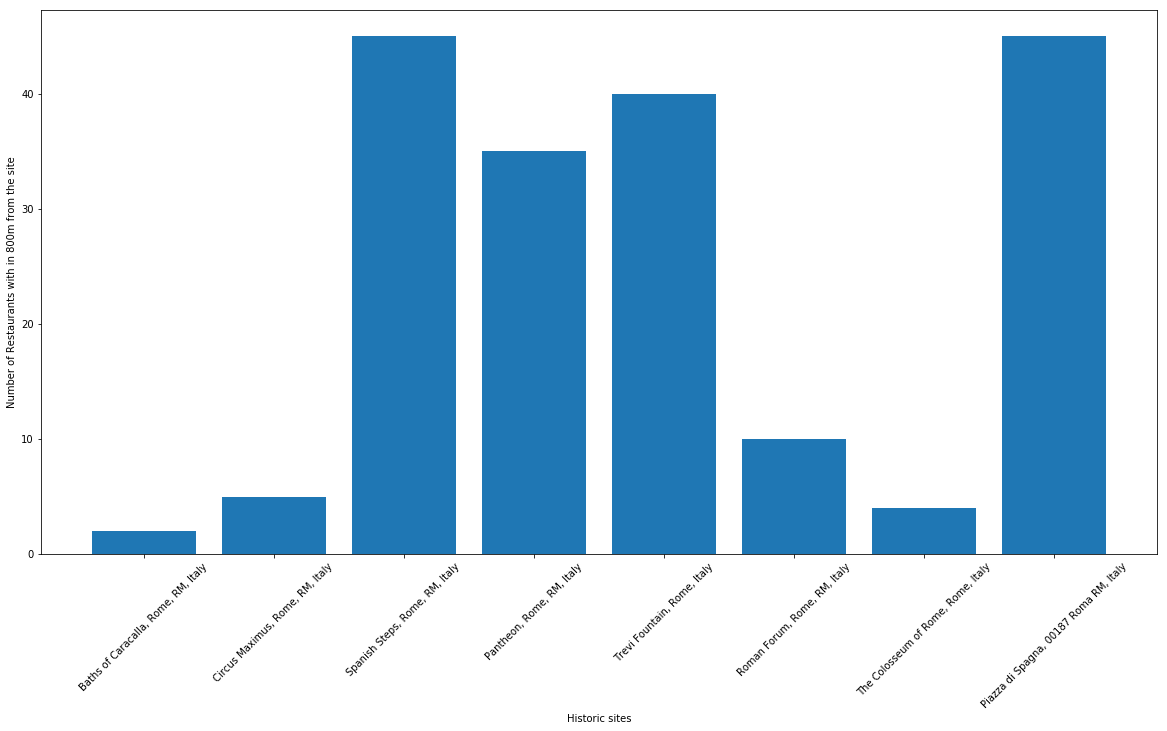

In [212]:
# Restuarants with in 1000m radius from the historic sites (Location data and categories)
search_query = 'Restaurant' 
color=['Red', 'green','blue','black','yellow', 'gray','purple','black']
Res_num=[];

for latitude, longitude, label, col in zip(df2.lat, df2.lon, df2.address,color):
    data_top7= get_data(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, 800, LIMIT) 
    
    Res_num.append(data_top7.categories.count())
    print(Res_num)
    for lat, lng, label in zip(data_top7.lat, data_top7.lng, data_top7.categories):
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5,
            color=col,
            popup=label,
           fill = True,
           fill_color=col,
           fill_opacity=0.6
        ).add_to(venues_map)   
    for lat, lng, label in zip(df2.lat, df2.lon, df2.address):
        folium.Marker(
            [lat, lng],
            popup=label
        ).add_to(venues_map)
df3 = pd.DataFrame() #np.array(add, lat, lon)
df3['Site']=df2.address
df3['NumberofRestuarant']=Res_num
# plot the total number of restauarnts serving tourists at each Historic sites

plt.figure(figsize=(20,10))
plt.bar(df3.Site, df3.NumberofRestuarant)
plt.xlabel("Historic sites")
plt.xticks( rotation=45)
plt.ylabel("Number of Restaurants with in 800m from the site")


In [211]:
# Display map with the historc sites and near by restaurants
venues_map

<h2>Result and Discussion</h2>

As we have seen from the figures, the distribution of the restauarants in the downtown area of the city, where we identified as top toursist destination area is highly varaible. Large number of restuarants can be found near Piazza di Spagna, Pantheon spanish steps and Tervi Fountain; where as very limited number of restuarants serve tourists at Circus Maximus, Roman Forum and the Colosseum areas due to different factors including the number of high foot traffic and avalaibility of commercial buildings to open restauarants in those areas. Particularly, the Colosseum area is one of the oldest massive stone amphitheater in the city Rome where street parking is not allowed, and everything you want should be by foot or on public transportation. 

The spanish steps and Piazza di Spagna with highest number restuarants (45 each), are most popular attraction and visted by very large number of people from around the world. The number of toursis visting these attaraction areas increases dramatically every year since 2012 according to Statista (https://www.statista.com/statistics/515727/rome-colosseum-and-roman-forum-visitor-numbers-italy/). Therefore, no matter the distribtion of the restaurants in the city, there is better potentail to open restaurants not only around these areas but also other parts of the city.

<h2>Conclusion</h2>

This study provides a very basic information for people in the restaurant bussinesses including the over all view of the distribution with in 1000m from the top histroic sites in the city. As we mentioned in the methodology, this study can be used as initial input for those who are interted to make a detail assessment. As we have a very limited data from Foursquare catagorization, additional data sources should also be considered to get more details input. Other factors can also be gathered from ground survey and the city master plan that will help to identify future expansion and potential bussiness area.

<h2>Reference </h2>

1. https://www.voyagetips.com/en/things-to-do-in-rome/
2. (https://developer.foursquare.com)
3. Statista, https://www.statista.com/statistics/515727/rome-colosseum-and-roman-forum-visitor-numbers-italy/.
    